# Evaluating machine learning classifiers

Examples of different methods of evaluating machine learning classifiers. I will be using pandas data frames to store and access data, sklearn library for ML.

## Load and explore the data

Use a sample dataset loaded with sklearn library. 

In [2]:
import pandas as pd

In [3]:
# Iris (flowers) dataset is a useful ds for multi-class classification.
from sklearn.datasets import load_iris
#iris_data = load_iris()


### Binary classification dataset
As a starting point, it makes sense to look at the binary classification, i.e. datasets with onl 2 targets. Cancer dataset fits the bill.

In [4]:
from sklearn.datasets import load_breast_cancer
cancer_ds = load_breast_cancer()
type(cancer_ds)   # Bunch
cancer_ds.feature_names
cancer_ds.data
cancer_ds.target
cancer_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer_features_df = pd.DataFrame(data=cancer_ds.data, columns=cancer_ds.feature_names)
cancer_features_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer_target_df = pd.DataFrame(data=cancer_ds.target, columns=["target"])
cancer_target_df.head()

,target
0,0
1,0
2,0
3,0
4,0


## Classifier
I'll use a Neural Networks classifier from the sklearn library to explore different ways to evaluate it.

In [7]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

## Validation
To validate our classifier, we need to train it and test it. To make sure that we do not over-fit the data, train and test set should not intersect. We also should run the cycle of {partition the data into train and test, train, test} a few times, since the result will differ depending on the data. The best way to excercise the the whole dataset to get a most consistent evaluation metrics is to use cross-validation. This is when we partition the data to, say, 90% for training and 10% for testing, evaluate it and then repeat the process 10 times in such a way that each time we take a different 10% for testing. This way we excercise all data for testing, without over-fitting.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# cross_validate differs from cross_val_score in that it allows for a multiple metrics to be 
# returned for each run. I.e. you can report precision and recall for each run.

In [9]:
# By default, the evaluation metric is accuracy. Here we evaluate our classifier (NN) with a 
# 10-fold cross-validation (cv=10). As a result we get an array of 10 accuracy values, 
# corresponding to each cross-validation run.
cross_val_score(classifier, X=cancer_features_df, y=cancer_target_df['target'], cv=10)

array([0.87931034, 0.36206897, 0.89473684, 0.94736842, 0.89473684,
       0.87719298, 0.63157895, 0.94642857, 0.85714286, 0.92857143])

In [10]:
cross_val_score(classifier, X=cancer_features_df, y=cancer_target_df['target'], 
                cv=10, scoring="precision")

array([0.94444444, 0.87804878, 0.91666667, 0.9375    , 0.92307692,
       0.94117647, 0.97142857, 0.86842105, 0.93939394, 0.75555556])

In [11]:
cross_val_score(classifier, X=cancer_features_df, y=cancer_target_df['target'], 
                cv=10, scoring="roc_auc")

array([0.93181818, 0.90025253, 0.98015873, 0.98941799, 0.96296296,
       0.97619048, 0.99206349, 0.62040816, 0.99047619, 0.86122449])

##### Evaluation metrics
cross_val_score allows for a number of metrics to be reported, like accuracy, f1, precision, recall, etc.  For more info see docs for model selection evaluation:
    https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
    
Common problems with classification metrics:
* Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

To report more then one metirc per run (fold), use a cross_validate function:

In [12]:
metrics = ["precision", "recall", "roc_auc"]

cross_validate(classifier, cancer_features_df, cancer_target_df["target"], cv=10,
                        return_train_score=False, scoring=metrics)

/Users/korolo/miniconda3/envs/ipython/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/korolo/miniconda3/envs/ipython/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/korolo/miniconda3/envs/ipython/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'fit_time': array([0.15625691, 0.04102397, 0.12420702, 0.00841594, 0.01851583,
        0.12378883, 0.01297402, 0.01869607, 0.010957  , 0.0125618 ]),
 'score_time': array([0.00184083, 0.00249505, 0.00188398, 0.00489497, 0.0018332 ,
        0.00189519, 0.00218391, 0.00191784, 0.00187182, 0.00309134]),
 'test_precision': array([0.94594595, 0.89473684, 0.91891892, 0.        , 0.91891892,
        0.89189189, 0.        , 0.88235294, 0.        , 0.        ]),
 'test_recall': array([0.97222222, 0.94444444, 0.94444444, 0.        , 0.94444444,
        0.91666667, 0.        , 0.85714286, 0.        , 0.        ]),
 'test_roc_auc': array([0.96212121, 0.95075758, 0.96957672, 0.81878307, 0.93783069,
        0.98148148, 0.96560847, 0.9170068 , 0.83537415, 0.9755102 ])}

#### Run classifier with cross-validation and plot ROC curves
To draw a ROC curve of cross-validation, we need to have TP rate and FP rate for each fold. This is not possible with the convenient function line cross_validate, therefore we ned to use cross-validation iterators to get this information while cross-validation.

Example: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py


In [39]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

classifier = MLPClassifier()
cvi = StratifiedKFold(n_splits=10)


iris = load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

#X,y = cancer_features_df, cancer_target_df["target"]

In [48]:
X

array([[ 5.1       ,  3.5       ,  1.4       , ..., -1.07709907,
        -0.4246633 , -0.8299646 ],
       [ 4.9       ,  3.        ,  1.4       , ...,  1.4121517 ,
        -1.38043075, -0.53591456],
       [ 4.7       ,  3.2       ,  1.3       , ...,  0.65880214,
        -0.59691711, -0.22295918],
       ...,
       [ 6.2       ,  2.9       ,  4.3       , ..., -0.8281054 ,
        -1.43286053, -0.60855489],
       [ 5.1       ,  2.5       ,  3.        , ...,  0.06532704,
        -0.55380986, -0.88254487],
       [ 5.7       ,  2.8       ,  4.1       , ..., -1.04873453,
         0.37475842, -0.98731143]])

TPR: [0.  0.  0.  0.2 0.2 1.  1. ]
FPR: [0.  0.2 0.4 0.4 0.6 0.6 1. ]
TPR: [0.2 0.2 0.4 0.4 1. ]
FPR: [0.  0.4 0.4 1.  1. ]
TPR: [0.2 0.2 0.4 0.4 0.8 0.8 1.  1. ]
FPR: [0.  0.4 0.4 0.6 0.6 0.8 0.8 1. ]
TPR: [0.  0.  0.  0.4 0.4 0.6 0.6 1. ]
FPR: [0.  0.2 0.6 0.6 0.8 0.8 1.  1. ]
TPR: [0.2 0.2 0.4 0.4 0.6 0.6 1. ]
FPR: [0.  0.6 0.6 0.8 0.8 1.  1. ]
TPR: [0.2 0.2 0.8 0.8 1. ]
FPR: [0.  0.2 0.2 1.  1. ]
TPR: [0.  0.  0.2 0.2 0.6 0.6 1. ]
FPR: [0.  0.2 0.2 0.8 0.8 1.  1. ]
TPR: [0.2 0.2 0.6 0.6 1. ]
FPR: [0.  0.6 0.6 1.  1. ]
TPR: [0.2 0.6 0.6 0.8 0.8 1.  1. ]
FPR: [0.  0.  0.6 0.6 0.8 0.8 1. ]
TPR: [0.  0.  0.2 0.2 0.8 0.8 1. ]
FPR: [0.  0.2 0.2 0.4 0.4 1.  1. ]


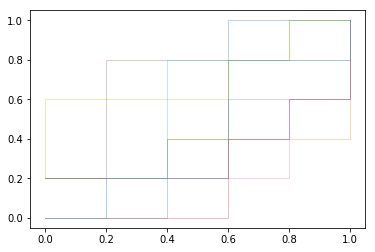

In [43]:
from scipy import interp


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cvi.split(X, y):
    #print("Size of training set: {}; size of test set: {} ".format(len(X[train]), len(X[test])))
    
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    #predictions = classifier.fit(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    print("TPR: {}".format(tpr))
    print("FPR: {}".format(fpr))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    


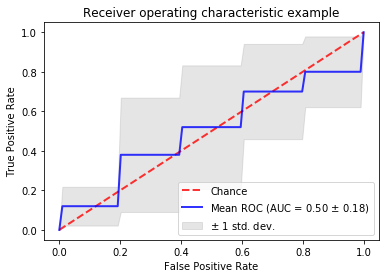

In [42]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
